In [47]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Key attributes from database

The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
country_long (text): longer form of the country designation
name (text): name or title of the power plant, generally in Romanized form
gppd_idnr (text): 10 or 12 character identifier for the power plant
capacity_mw (number): electrical generating capacity in megawatts
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
primary_fuel (text): energy source used in primary electricity generation or export
other_fuel1 (text): energy source used in electricity generation or export
other_fuel2 (text): energy source used in electricity generation or export
other_fuel3 (text): energy source used in electricity generation or export
commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
owner (text): majority shareholder of the power plant, generally in Romanized form
source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url (text): web document corresponding to the source field
geolocation_source (text): attribution for geolocation information
wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
year_of_capacity_data (number): year the capacity information was reported
generation_data_source (text): attribution for the reported generation information
generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#To ensure that in future observations do not get impacted due to any truncated information being displayed in our Jupter Notebook.

In [50]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From Above result we can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

Column names that have more than 50% (more than 450 rows) of missing data and will need to be deleted are:

other_fuel1
other_fuel2
other_fuel3
owner
wepp_id
generation_gwh_2013
generation_gwh_2014
generation_gwh_2015
generation_gwh_2016
generation_gwh_2017
generation_gwh_2018
generation_gwh_2019
generation_data_source
estimated_generation_gwh

In [52]:
df.drop(["other_fuel1", "other_fuel2", "other_fuel3", "owner", "wepp_id", "generation_gwh_2013",
        "generation_gwh_2014", "generation_gwh_2015", "generation_gwh_2016", "generation_gwh_2017","generation_gwh_2018",
        "generation_gwh_2019","generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [53]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


In [54]:
df.drop(["year_of_capacity_data", "url", "gppd_idnr", "name", "country_long", "country"], axis=1, inplace=True)

#Removing columns which has all the rows repeated values and low info columns.

In [56]:
df.info() #used to find the columns data type we have total 7 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


In [57]:
# getting list of object data type column names
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are: ", float_datatype)

Object Data Type Columns are:  ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year']


In [58]:
df.isnull().sum()

capacity_mw             0
latitude               46
longitude              46
primary_fuel            0
commissioning_year    380
source                  0
geolocation_source     19
dtype: int64

In [60]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

#replacing the null values with mean for continuous data and mode for categorical data.

In [61]:
df.isnull().sum() #below result shows that we have taken care of the missing data.

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [63]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)
    
#Taking a look at the object data type columns so as to check how many categories each of them hold 
#and how many values/rows are populated with that data.

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Reliance Power Ltd                                               4
PEDA                                                             3
SunBorne Energy Gujarat One Private Limited                      3
Shri Ssk ltd           

# Visualizing the data

In [64]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

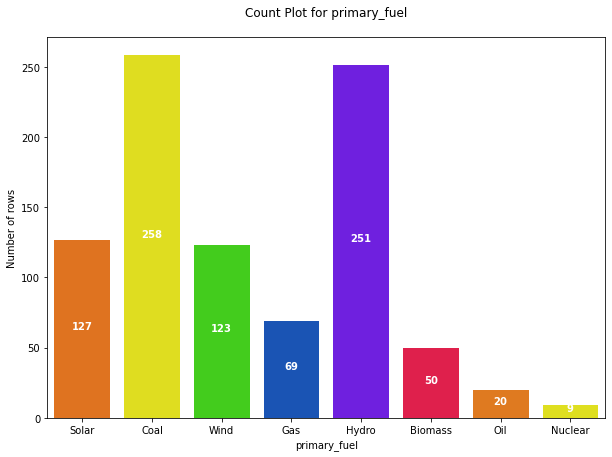

In [65]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'primary_fuel'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

#the countplot shows the data of primary fuel values and it shows other than coal & Hydro all other have low values.
#this will create a imbalance when we take a primary fuel value for classification model.
#we need to treat them accordingly.

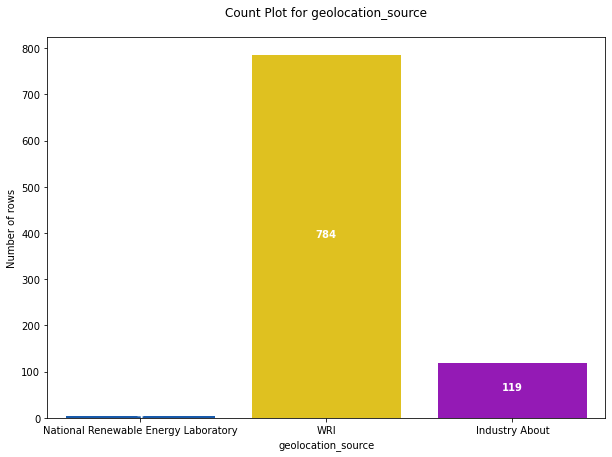

In [66]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'geolocation_source'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

#the below count plot for geolocation value which shows WRI has high values and NREL (National Renewable Energy Laboratory) with
#least values which can negligible.

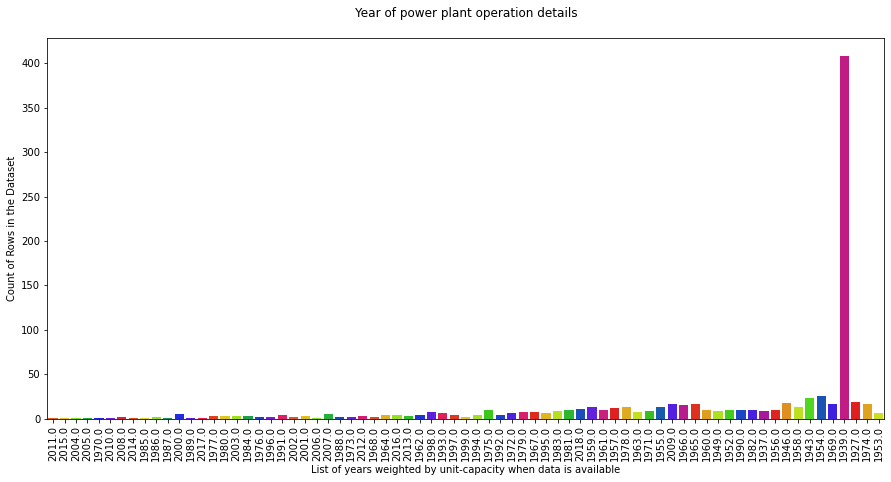

In [67]:
plt.figure(figsize=(15,7))
values = list(df['commissioning_year'].unique())
diag = sns.countplot(df["commissioning_year"], palette="prism")
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of Rows in the Dataset")
plt.show()

In [68]:
#In the above count plot we can see the list of years as to when the power plant data was made available. 
#Since we had missing values in the "commissioning_year" column we replaced it with the mode wherein the year 1939
#covered the most rows in our dataset compared to all the other years.

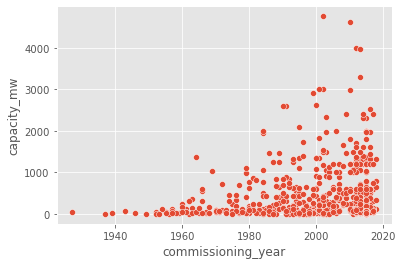

In [69]:
plt.style.use('ggplot')
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()


#Below Scatter plot we can see that the electricity generating capacity measured in mega watts 
#which was pretty low in the olden times as compared to recent years due to the invention of efficient fuel types
#used for power generation.

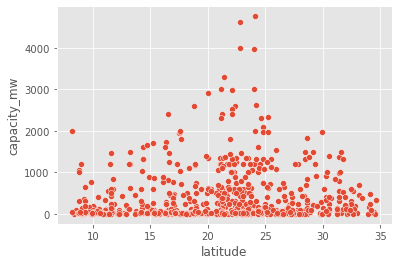

In [70]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

#Below scatter plot we can see that the latitude geolocation for electricty generation is highest measuring the mega watts between 20 to 25 decimal degrees.

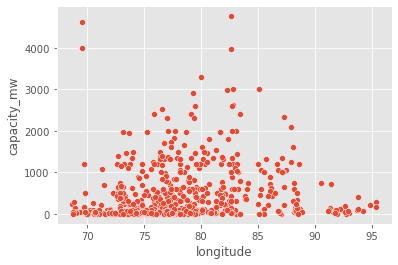

In [71]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

In [72]:
#The above scatter plot we can see that the longitude geolocation for electricty generation is highest measuring the mega watts around 70 and then again between 80-85 decimal degrees.

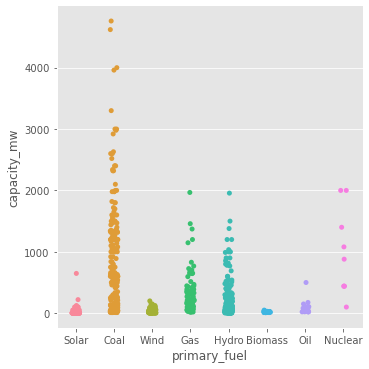

In [73]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

#Below categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

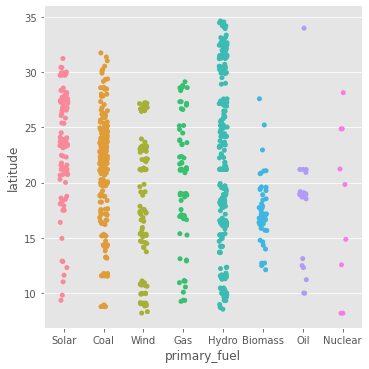

In [74]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

#Below categorical plot we can see that hydro fuel type is distributed across all the latitude values 
#considering the water bodies that help in generating electricity at a power plant.

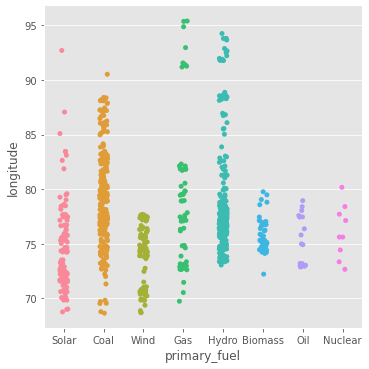

In [75]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

#Below categorical plot we can see that longitude wise decimal degress have quite a splitting data between coal and hydro considering
#the land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type. 
#Then we have fuel types solar and wind that are quite comprising when targeted across the longitude values.

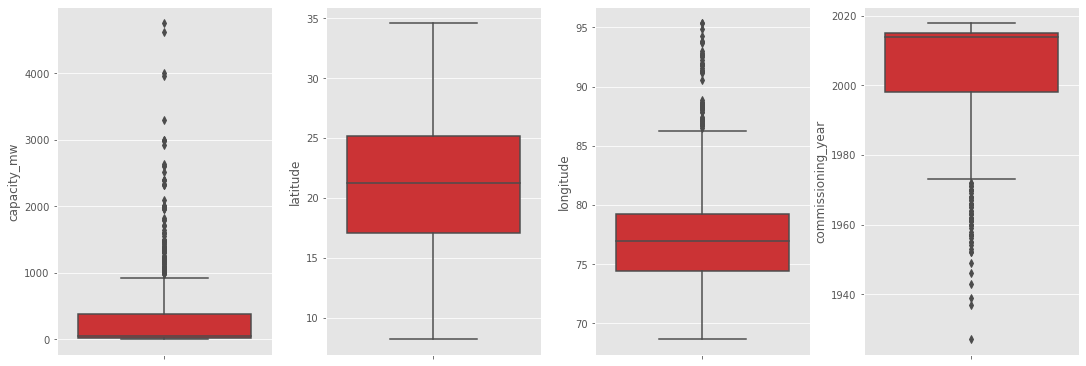

In [76]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#Below box plot we can see presence of outliers in our numerical columns that will need to be checked before we start building any machine learning model.

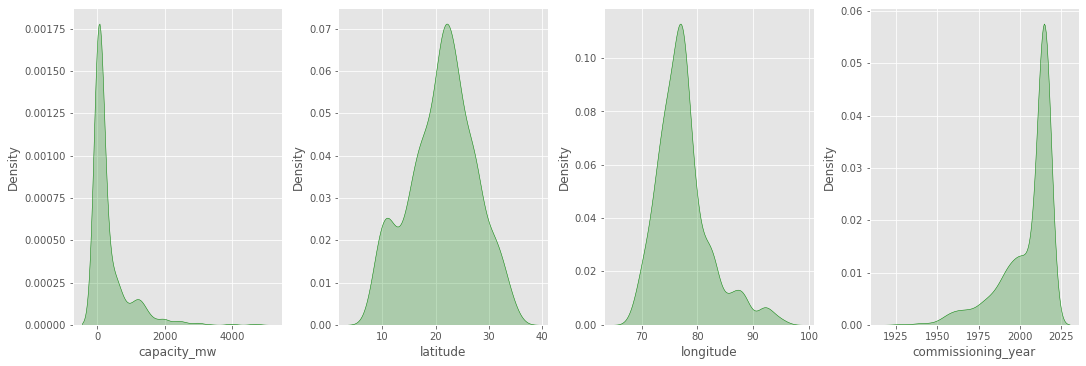

In [78]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[float_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

#Below distribution plot created for our numerical data columns to check for skewness and treated it

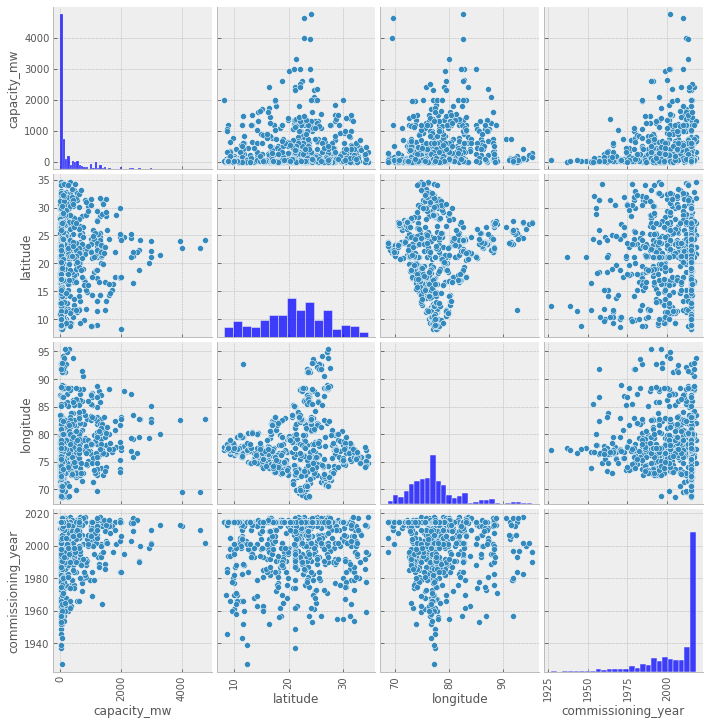

In [79]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

# Encoding all the object datatype columns

In [80]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

#Using Label Encoder on target column "primary_fuel" since we want labels to be converted from the object datatype to numerical datatype.

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI


In [81]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['geolocation_source'] = oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source'] = oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

#Using the Ordinal Encoder to convert all the categorical feature columns from object datatype to numerical datatype.


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0


# Correlation using a Heatmap

#Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

#Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

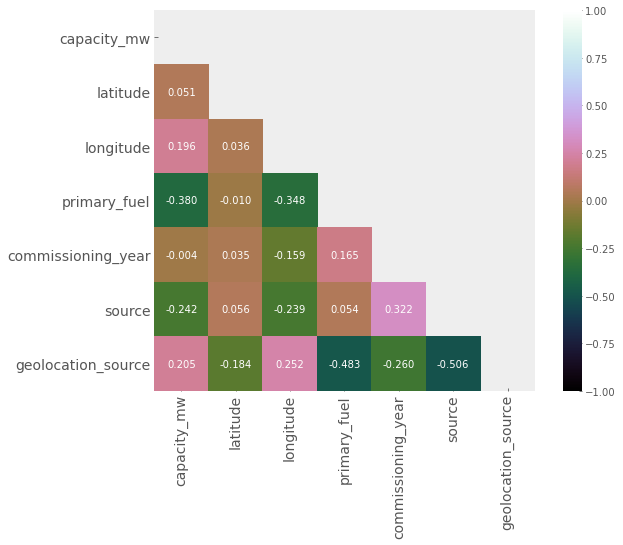

In [82]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Below heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. 
#Also we see very less or negligible amount of multi collinearity so we will not have to worry about it. 
#Since the one's which are reflecting the value are inter dependent on those feature columns and planning to retain and keep them.

# Correlation Bar Plot comparing features with our labels

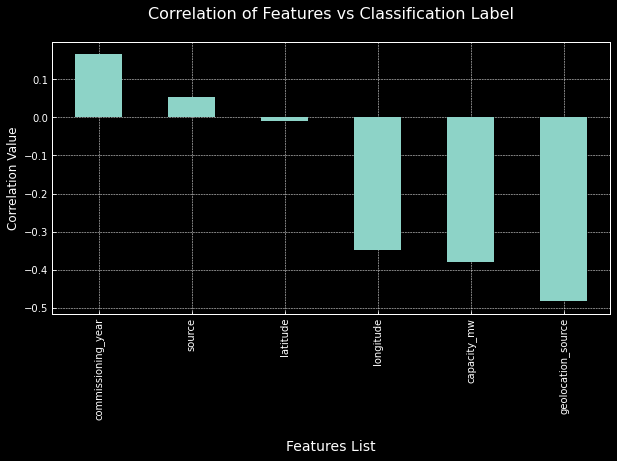

In [83]:
plt.style.use('dark_background')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

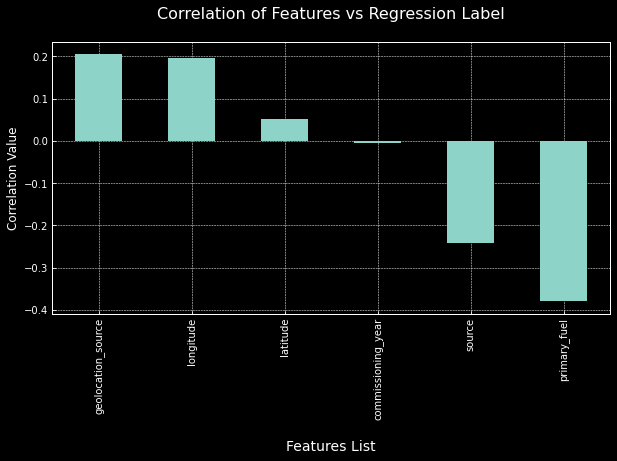

In [85]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 3 of them with positive correlation and 3 of them with neagtive correlation.

# Removing Outliers using Z Score

In [86]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 7)
Shape of the dataframe after removing outliers:  (838, 7)
Percentage of data loss post outlier removal:  7.6074972436604185


In [88]:
df.skew()

#The skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 skewness value.

capacity_mw           1.967086
latitude             -0.112601
longitude             0.903442
primary_fuel          0.418559
commissioning_year   -1.500521
source                1.792245
geolocation_source   -2.112259
dtype: float64

# Using Log Transform to fix skewness

In [90]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

#allocating the X&Y for features and columns.

In [91]:
Y.value_counts()

1    234
3    222
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [92]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)


In [93]:
Y.value_counts()

0    234
1    234
2    234
3    234
4    234
5    234
6    234
7    234
Name: primary_fuel, dtype: int64

# Feature Scaling

In [94]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-0.620926,1.461636,-0.867462,0.410527,1.348833,-1.185156
1,-0.404583,0.864346,-0.487499,0.735509,2.787265,0.368731
2,-0.537787,0.364069,-1.941428,0.735509,-0.598582,0.368731
3,-0.320764,0.707910,4.164138,-0.158191,-0.576452,0.368731
4,3.451089,0.373944,1.678509,0.735509,-0.576452,0.368731


# Finding best random state for building Classification Models 

In [95]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 73.07692307692307 on Random State 403


# Machine Learning Model for Classification with Evaluation Metrics

In [96]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [97]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76        69
           1       0.58      0.47      0.52        47
           2       0.42      0.39      0.41        36
           3       0.56      0.40      0.47        77
           4       0.77      0.83      0.80        64
           5       0.38      0.38      0.38        55
           6       1.00      0.96      0.98        57
           7       0.81      1.00      0.89        63

    accuracy                           0.68       468
   macro avg       0.65      0.66      0.65       468
weighted avg       0.66      0.68      0.67       468

Accuracy Score: 67.73504273504274
Cross Validation Score: 66.29247771836006

Accuracy Score - Cross Validation Score is 1.4425650166826784


In [98]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90        69
           1       0.68      0.57      0.62        47
           2       0.48      0.39      0.43        36
           3       0.89      0.64      0.74        77
           4       0.82      1.00      0.90        64
           5       0.65      0.80      0.72        55
           6       1.00      0.96      0.98        57
           7       0.81      1.00      0.89        63

    accuracy                           0.80       468
   macro avg       0.78      0.78      0.77       468
weighted avg       0.81      0.80      0.80       468

Accuracy Score: 80.34188034188034
Cross Validation Score: 79.32663101604278

Accuracy Score - Cross Validation Score is 1.0152493258375586


In [99]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        69
           1       0.69      0.70      0.69        47
           2       0.71      0.75      0.73        36
           3       0.87      0.81      0.84        77
           4       0.95      0.92      0.94        64
           5       0.79      0.91      0.85        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.88       468
   macro avg       0.87      0.88      0.87       468
weighted avg       0.89      0.88      0.89       468

Accuracy Score: 88.46153846153845
Cross Validation Score: 85.68313725490195

Accuracy Score - Cross Validation Score is 2.7784012066365023


In [100]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.80      0.83      0.81        47
           2       0.70      0.72      0.71        36
           3       0.94      0.79      0.86        77
           4       0.90      1.00      0.95        64
           5       0.86      0.91      0.88        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.91       468
   macro avg       0.90      0.90      0.90       468
weighted avg       0.92      0.91      0.91       468

Accuracy Score: 91.45299145299145
Cross Validation Score: 89.95764705882353

Accuracy Score - Cross Validation Score is 1.4953443941679296


In [101]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        69
           1       0.81      0.55      0.66        47
           2       0.59      0.53      0.56        36
           3       0.88      0.56      0.68        77
           4       0.75      0.95      0.84        64
           5       0.70      0.78      0.74        55
           6       0.95      0.98      0.97        57
           7       0.75      0.97      0.85        63

    accuracy                           0.79       468
   macro avg       0.79      0.78      0.77       468
weighted avg       0.80      0.79      0.79       468

Accuracy Score: 79.48717948717949
Cross Validation Score: 78.68449197860963

Accuracy Score - Cross Validation Score is 0.8026875085698606


In [102]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       0.85      0.72      0.78        47
           2       0.70      0.78      0.74        36
           3       0.94      0.83      0.88        77
           4       0.90      0.98      0.94        64
           5       0.91      0.95      0.93        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63

    accuracy                           0.92       468
   macro avg       0.91      0.91      0.91       468
weighted avg       0.92      0.92      0.92       468

Accuracy Score: 91.88034188034187
Cross Validation Score: 90.5443137254902

Accuracy Score - Cross Validation Score is 1.3360281548516753


# Hyper parameter tuning on the best Classification ML Model

In [103]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

#After comparing the result have choosen Extra Trees Classifier as my best model and tuning it for best accuracy.

In [104]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

#Using the Grid Search CV method for hyper parameter tuning my best classification model.

In [105]:
GSCV.fit(X_train,Y_train)



GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4], 'n_jobs': [2, 1, -1],
                         'random_state': [42, 45, 111]})

In [106]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'min_samples_split': 3,
 'n_jobs': 2,
 'random_state': 42}

In [107]:
Final_Model = ExtraTreesClassifier(criterion="gini", max_depth=30, min_samples_split=4, n_jobs=2, random_state=42)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

#Accuracy improved.

Accuracy score for the Best Model is: 92.73504273504274


# AUC ROC Curve for multi class label

In [108]:
y_prob = Classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

#Generated the ROC Curve for final classification model and it shows the One-vs-One ROC AUC scores and One-vs-Rest ROC AUC scores.

One-vs-One ROC AUC scores:
0.995522 (macro),
0.995666 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.995659 (macro),
0.995837 (weighted by prevalence)


# Confusion Matrix

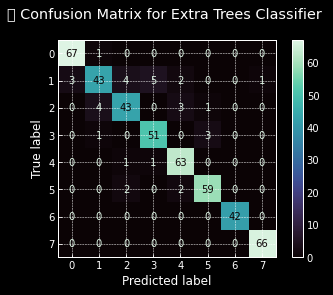

In [109]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#With the help of below confusion matrix able to understand the number of times got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)